## Лабораторная работа 4

Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
Цель лабораторной работы: изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

#### Требования к отчету:
Отчет по лабораторной работе должен содержать:

титульный лист;
описание задания;
текст программы;
экранные формы с примерами выполнения программы.

#### Задание:

- 1 Выберите набор данных (датасет) для решения задачи классификации или регресии.
- 2 В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- 3 С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- 4 Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
- 5 Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
- 6 Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
- 7 Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
- 8 Постройте кривые обучения и валидации.

dataset

__Задача__ (для выбранного датасета) - предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

##### Объективные признаки:
- Возраст
- Рост
- Вес
- Пол

##### Результаты измерения:
- Артериальное давление верхнее и нижнее
- Холестерин
- Глюкоза

##### Субъективные признаки:
- Курение
- Употребление Алкоголя
- Физическая активность

In [86]:
#Start ML proj
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [81]:
df = pd.read_csv('data/mlbootcamp5_train.csv', error_bad_lines=False, comment='#')
df.drop(columns='id', inplace = True);

In [82]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [83]:
df.shape

(70000, 12)

In [84]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Преобразуем возраст в года

In [85]:
X = df.drop(columns='cardio')
X.age = X.age /255.25
y = df.cardio

#### Разобьем датасет на тренировочный и обучающий

In [36]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Построим модель классификации ближайших соседей без применения кросс-валидации

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

In [59]:
print('accuracy train:', AS(y_train, clf.predict(X_train)))
print('accuracy test :', AS(y_test, clf.predict(X_test)), '\n')

print('precission train:', PS(y_train, clf.predict(X_train)))
print('precission test :', PS(y_test, clf.predict(X_test)), '\n')

print('recall train:', RS(y_train, clf.predict(X_train)))
print('recall test :', RS(y_test, clf.predict(X_test)), '\n')

accuracy train: 0.7812321428571428
accuracy test : 0.6880714285714286 

precission train: 0.7912537302435251
precission test : 0.6910971223021583 

recall train: 0.765341030575155
recall test : 0.6666184762180136 



#### Применим кросс-валидационные способы, такие как ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

In [96]:
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

kf = KFold(n_splits=5, shuffle=True, random_state=1)

print('KFold')
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=kf, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))
print('\n\n')

print('ShuffleSplit')
sh = ShuffleSplit(random_state=1)
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=sh, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))
print('\n\n')



print('StratifiedKFold')
sfkf = StratifiedKFold(random_state=1)
%time scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=sfkf, scoring='accuracy')
print('Accuracy train: %0.2f (± %0.2f)' % (scores.mean(), scores.std() * 2))
print('\n\n')

KFold
Wall time: 14.6 s
Accuracy train: 0.69 (± 0.00)



ShuffleSplit
Wall time: 23.2 s
Accuracy train: 0.69 (± 0.01)



StratifiedKFold


C:\Users\als\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Wall time: 16.8 s
Accuracy train: 0.69 (± 0.00)





### Изспользуем GridSerarchCV для подбора гиперпараметров по сетке

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [105]:
params = {'n_neighbors': np.arange(3,20,2)}
kf_cv = KFold(n_splits=5, shuffle=True, random_state=True)

grsrch = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=kf_cv)

grsrch.fit(X_train, y_train)
grsrch.best_params_

{'n_neighbors': 19}

##### Обучим модель с найденными наилучшими параметрами

In [109]:
gr_clf = grsrch.best_estimator_

In [110]:
%time gr_clf.fit(X_train, y_train)

Wall time: 2.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [111]:
print('accuracy train:', AS(y_train, gr_clf.predict(X_train)))
print('accuracy test :', AS(y_test, gr_clf.predict(X_test)), '\n')

print('precission train:', PS(y_train, gr_clf.predict(X_train)))
print('precission test :', PS(y_test, gr_clf.predict(X_test)), '\n')

print('recall train:', RS(y_train, gr_clf.predict(X_train)))
print('recall test :', RS(y_test, gr_clf.predict(X_test)), '\n')

accuracy train: 0.7422857142857143
accuracy test : 0.7145 

precission train: 0.7615721194442312
precission test : 0.7267080745341615 

recall train: 0.7070771862304897
recall test : 0.6765938990892005 



Видно, что значения метрик качества на тренировочном сете немного ухудшился, но улучшился на тестовом сете.

### Построим кривую обучения

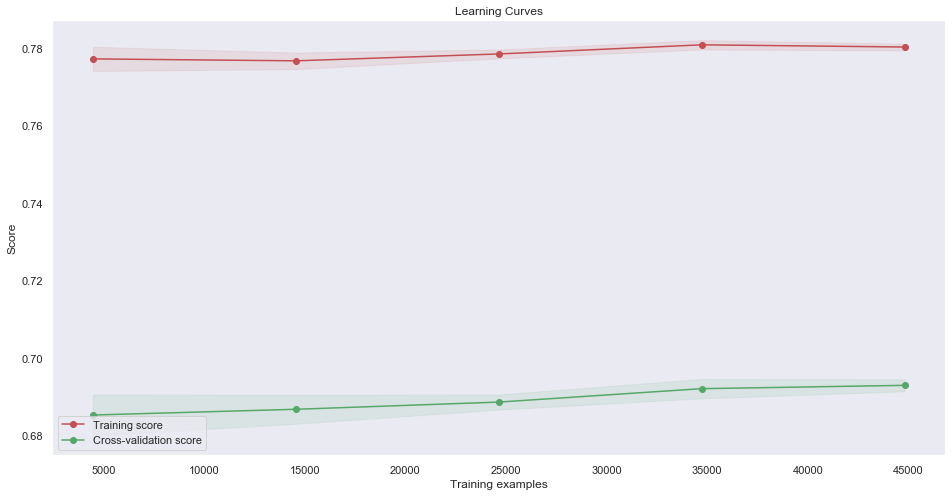

In [117]:
train_sizes = np.linspace(.1, 1.0, 5)

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(), X_train, y_train, cv=KFold(n_splits=5), n_jobs=-1,
    train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score");
plt.legend(loc="best");

#### Построим кривую валидации

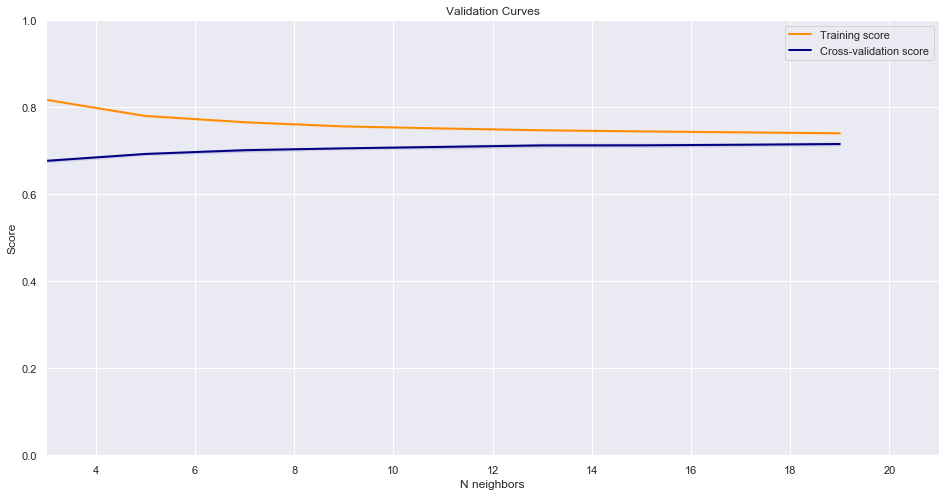

In [113]:
from sklearn.model_selection import learning_curve, validation_curve


param_range = np.arange(3,20,2)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=-1,
    cv=KFold(n_splits=5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curves")
plt.xlabel("N neighbors")
plt.ylabel("Score")
plt.xlim(3.0, 21.0)
plt.ylim(0.0, 1.0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best");